Dataset columns: Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
Confusion Matrix for Training Data:
 [[2005  115]
 [  29 1266]]
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      2120
           1       0.92      0.98      0.95      1295

    accuracy                           0.96      3415
   macro avg       0.95      0.96      0.96      3415
weighted avg       0.96      0.96      0.96      3415

Confusion Matrix for Test Data:
 [[498  38]
 [  7 311]]
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       536
           1       0.89      0.98      0.93       3

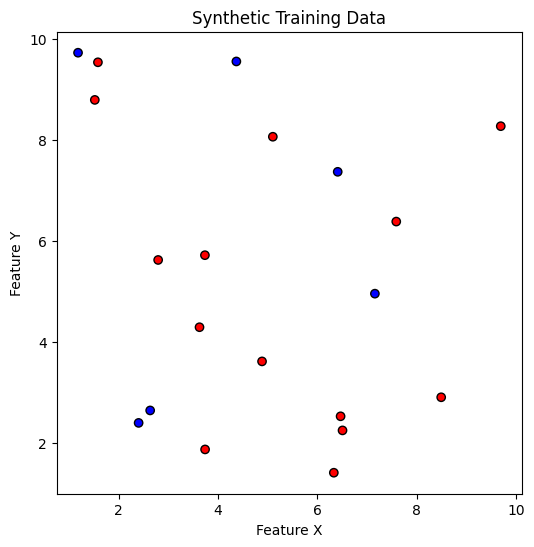

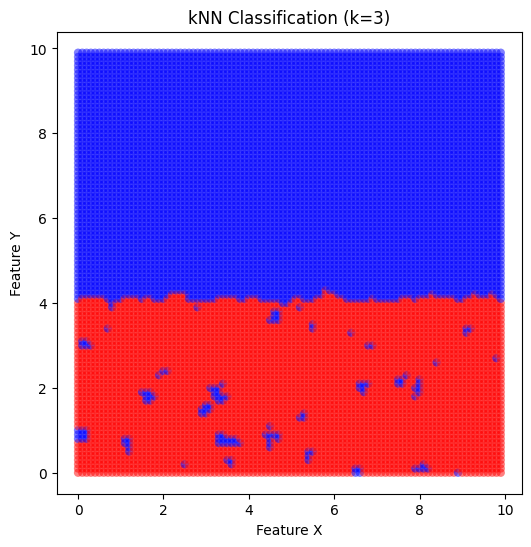

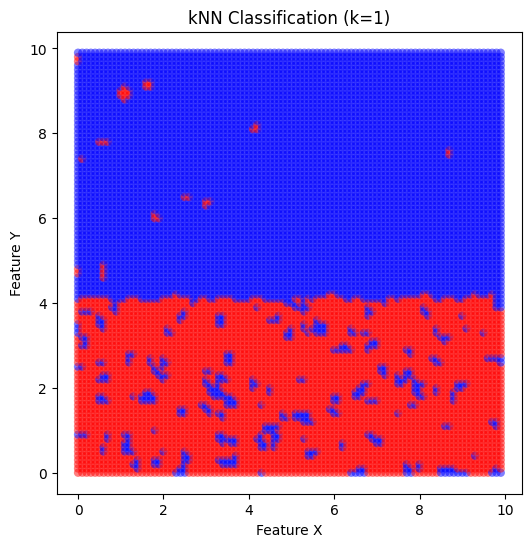

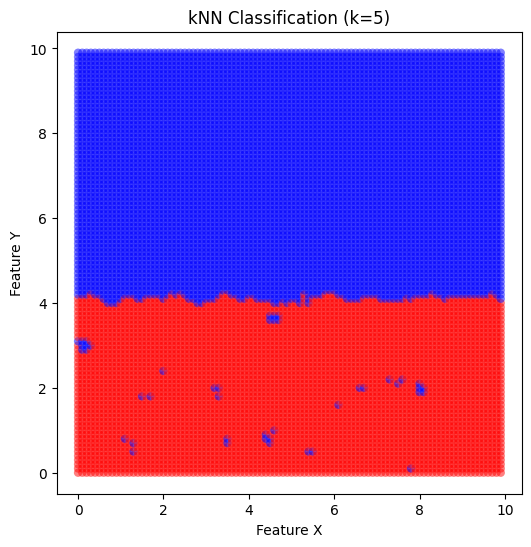

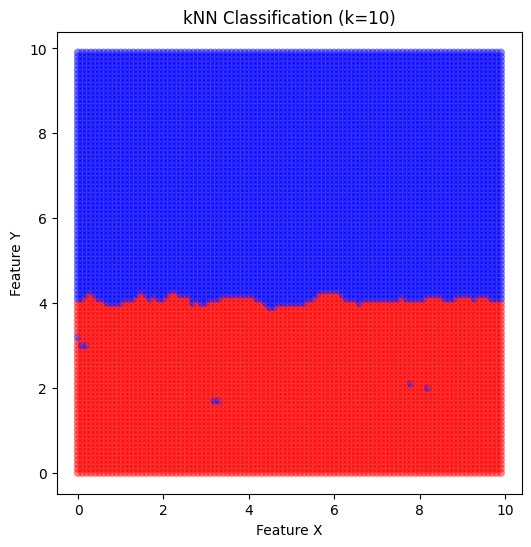

Best k value: 20


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(file_path)

# Print column names to verify the target variable
print("Dataset columns:", df.columns)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Verify if 'loan_status' exists
target = 'loan_status'
if target not in df.columns:
    raise KeyError(f"Column '{target}' not found in dataset. Available columns: {df.columns}")

# Selecting two numerical features for classification
features = ['income_annum', 'cibil_score']

# Encoding categorical target variable
df[target] = LabelEncoder().fit_transform(df[target])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# A1: Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# A1: Evaluate confusion matrix and classification metrics
def evaluate_performance(y_true, y_pred, dataset):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {dataset} Data:\n", cm)
    print(f"Classification Report for {dataset} Data:\n", classification_report(y_true, y_pred))

evaluate_performance(y_train, y_train_pred, "Training")
evaluate_performance(y_test, y_test_pred, "Test")

# A3: Generate synthetic training data for scatter plot
np.random.seed(42)
X_train_synthetic = np.random.uniform(1, 10, (20, 2))
y_train_synthetic = np.random.choice([0, 1], size=20)

# A3: Plot training data
plt.figure(figsize=(6, 6))
plt.scatter(X_train_synthetic[:, 0], X_train_synthetic[:, 1], c=y_train_synthetic, cmap='bwr', edgecolors='k')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Synthetic Training Data')
plt.show()

# A4: Generate test data
X_test_synthetic = np.array([(x, y) for x in np.arange(0, 10, 0.1) for y in np.arange(0, 10, 0.1)])
y_test_synthetic = knn.predict(StandardScaler().fit_transform(X_test_synthetic))

# A4: Plot classified test data
plt.figure(figsize=(6, 6))
plt.scatter(X_test_synthetic[:, 0], X_test_synthetic[:, 1], c=y_test_synthetic, cmap='bwr', alpha=0.5, edgecolors='none')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification (k=3)')
plt.show()

# A5: Repeat with different k values and observe class boundaries
k_values = [1, 5, 10]
for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_scaled, y_train)
    y_test_k = knn_k.predict(StandardScaler().fit_transform(X_test_synthetic))

    plt.figure(figsize=(6, 6))
    plt.scatter(X_test_synthetic[:, 0], X_test_synthetic[:, 1], c=y_test_k, cmap='bwr', alpha=0.5, edgecolors='none')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification (k={k})')
    plt.show()

# A7: Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best k value:", grid_search.best_params_['n_neighbors'])
